In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# read in data sets and check first rows.
pd.set_option('display.max_columns', None)
df = pd.read_csv('Data/used_cars.csv')
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [3]:
df.shape

(4009, 12)

# Data Cleaning

In [4]:
# checking data types for inconcistencies, none found. 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dtypes = df.dtypes
print(dtypes)

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object


> What stands out right away is the milage and price being objects, this is due to their formating. We will first have to adjust these to be intigers. 

In [5]:
df['milage'] = df['milage'].str.replace(' mi.', '', regex=False).str.replace(',', '').astype(int)
df['price'] = df['price'].str.replace('$', '', regex=False).str.replace(',', '').astype(int)
df.dtypes

brand           object
model           object
model_year       int64
milage           int32
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int32
dtype: object

> With that taken care of I will move on to checking for null values

In [6]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [7]:
# checking distribution for clean_title
df['clean_title'].value_counts()

clean_title
Yes    3413
Name: count, dtype: int64

> It appears as if the data was imput as NaN instead of 'No' for this feature so we will simply fill these in While we are at it, I will change this feature into 1s and 0s for use in our model later.

In [8]:
df['clean_title'] = df['clean_title'].replace({'Yes': 1})
df['clean_title'].fillna(0, inplace = True)
df['clean_title'].value_counts()

C:\Users\belie\AppData\Local\Temp\ipykernel_7456\3060888392.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['clean_title'] = df['clean_title'].replace({'Yes': 1})
C:\Users\belie\AppData\Local\Temp\ipykernel_7456\3060888392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].

clean_title
1.0    3413
0.0     596
Name: count, dtype: int64

In [9]:
#checking Fuel Type
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

> With Gasoline making up such a large part of this group, I will simply change the null values to Gasoline and also drop the two rows under 'not supported'. I will do the same for the values oof '-'

In [10]:
df['fuel_type'].fillna('Gasoline', inplace = True)
df ['fuel_type'] = df['fuel_type'].replace('–', 'Gasoline')
df = df[df['fuel_type'] != 'not supported']

C:\Users\belie\AppData\Local\Temp\ipykernel_7456\1948621483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna('Gasoline', inplace = True)


In [11]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3524
Hybrid             194
E85 Flex Fuel      139
Diesel             116
Plug-In Hybrid      34
Name: count, dtype: int64

In [12]:
# Last we will check the accident feature
df['accident'].value_counts()

accident
None reported                             2908
At least 1 accident or damage reported     986
Name: count, dtype: int64

> I will make an assumption that any null values were a lack of accident beign reported and change them as such. I will also being changing these to 1's nad 0s as I did for clean title.

In [13]:
df['accident'].fillna('None reported', inplace = True)
df['accident'] = df['accident'].replace({'At least 1 accident or damage reported': 1, 'None reported' : 0})
df['accident'].value_counts()

C:\Users\belie\AppData\Local\Temp\ipykernel_7456\1383473489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accident'].fillna('None reported', inplace = True)
C:\Users\belie\AppData\Local\Temp\ipykernel_7456\1383473489.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['accident'] = df['

accident
0    3021
1     986
Name: count, dtype: int64

> With the null values handled I will now check for outliers in the milage and price features.

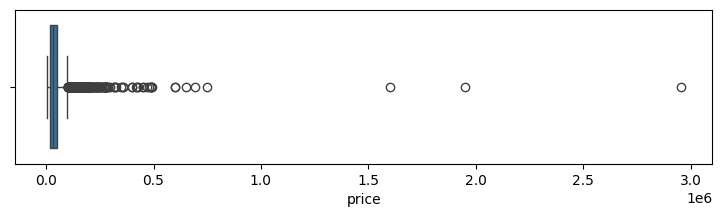

In [14]:
plt.figure(figsize = (9, 2))

sns.boxplot(df,
            x = 'price');

> It seems we have a few very high outliers in the price feature. For the sake of the model we will remove these. 

In [15]:
df['price'].mean()

44568.4402295982

In [16]:
# Checking highest prices
df['price'].nlargest(10)

693     2954083
229     1950995
3046    1599000
1356     749950
624      695000
979      649999
1615     599995
1508     599000
3655     491836
1061     489995
Name: price, dtype: int32

> We can see compared to the average we have quite a large number of outliers on the top end. I will use the IQR method to see what the upper bound of this column is and make a decision on what to remove

In [17]:
# Defining the 'upperbound' based on IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print(upper_bound)

99181.25


In [18]:
count = (df['price'] > upper_bound).sum()
print(count)

244


> Removing the upper bound would eliminate 244 rows from our dataset. Since this would only remove a little over 6% of the data I am choosing to remove the entire upper bound as these outliers could cause a lot of trouble later on. 

In [19]:
df = df[df['price'] <= upper_bound]
df.shape

(3763, 12)

>Now I will check the outliers for the milage feature

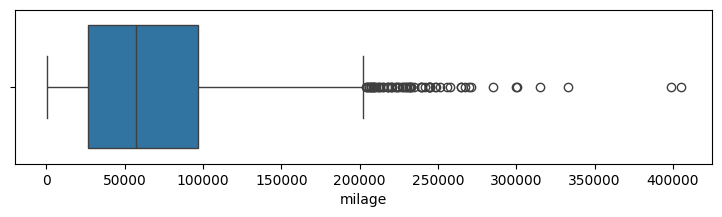

In [20]:
plt.figure(figsize = (9, 2))

sns.boxplot(df,
            x = 'milage');

> since we can see a large number of outliers similar to price, I will perform the same steps as before. 

In [21]:
df['milage'].mean()

68088.95110284348

In [22]:
# Checking highest prices
df['milage'].nlargest(10)

2764    405000
3348    399000
2175    333361
3757    315000
31      300183
1145    300000
3118    285000
3747    271000
2558    269885
3158    267000
Name: milage, dtype: int32

In [23]:
# Defining the 'upperbound' based on IQR method
Q1 = df['milage'].quantile(0.25)
Q3 = df['milage'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

print(upper_bound)

202766.25


In [24]:
count = (df['milage'] > upper_bound).sum()
print(count)

65


> With an even smaller set of rows as outliers i will go ahead and remove these as well

In [25]:
df = df[df['milage'] <= upper_bound]
df.shape

(3698, 12)

> With the outliers removed I will now move on to engineering some new features and consolidating others.

# Feature Engineering

In [26]:
df['brand'].value_counts()

brand
Ford             370
BMW              359
Chevrolet        280
Mercedes-Benz    277
Audi             188
Toyota           183
Lexus            154
Porsche          147
Jeep             142
Land             113
Nissan           110
Cadillac          99
RAM               91
Tesla             87
GMC               87
Dodge             80
Kia               75
Hyundai           72
Acura             63
Mazda             63
Subaru            63
Honda             61
INFINITI          59
Volkswagen        58
Lincoln           52
Jaguar            47
Volvo             36
MINI              33
Buick             30
Maserati          30
Chrysler          28
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Bentley           13
Scion              6
Saturn             5
Aston              5
FIAT               5
Lotus              4
Mercury            3
Karma              2
Saab               2
Rolls-Royce        2
Lucid  

> There are a large number of brands in our data but many of them appear in low numbers. In order to simplify the data and prevent the model from overfitting on those low count brands, I am going to merge all brands with a count below 50 to 'Other'.

In [27]:
#Consolidating Brands
Counts = df['brand'].value_counts()
Replace = Counts[Counts <= 50].index
df['brand'] = df['brand'].replace(Replace, 'Other')

> With that done, I will move on to a few features that are a bit messy and attempt to create scripts to consolidate them into a more useable form

In [28]:
df['transmission'].value_counts()
# Looking through I can see many values that should be paired together

transmission
A/T                                                                 966
8-Speed A/T                                                         371
Transmission w/Dual Shift Mode                                      362
6-Speed A/T                                                         352
6-Speed M/T                                                         235
Automatic                                                           213
7-Speed A/T                                                         196
8-Speed Automatic                                                   158
10-Speed A/T                                                        113
5-Speed A/T                                                          81
6-Speed Automatic                                                    73
9-Speed A/T                                                          68
4-Speed A/T                                                          65
1-Speed A/T                                        

In [29]:
# Creating a script to clean the transmission feature. I want to reduce it down to as few options as possible. Breaking it down by speed and transmission type.
# I have also left two options for mannual and automatic when no speed is given.
# Everything else will be grouped into 'Other'

def consolidate_transmission(trans_desc):
    if pd.isna(trans_desc):
        return "Other"  
    
    trans_desc = trans_desc.lower()
    
    # Identify transmission type
    if any(term in trans_desc for term in ["at", "a/t", "automatic"]):
        trans_type = "Automatic"
    elif any(term in trans_desc for term in ["mt", "m/t", "manual"]):
        trans_type = "Manual"
    else:
        return "Other" 
    
    # Extract speed (e.g., "6-speed", "5 spd")
    speed_match = re.search(r'(\d+)[-\s]?(?:speed|spd)', trans_desc)
    
    if speed_match:
        speed = speed_match.group(1)
        return f"{speed}-Speed {trans_type}"
    
    return trans_type
df['transmission_cleaned'] = df['transmission'].apply(consolidate_transmission)

df['transmission_cleaned'].value_counts()


transmission_cleaned
Automatic             1216
8-Speed Automatic      540
Other                  444
6-Speed Automatic      431
6-Speed Manual         243
7-Speed Automatic      208
10-Speed Automatic     168
9-Speed Automatic      109
5-Speed Automatic       90
1-Speed Automatic       75
4-Speed Automatic       69
5-Speed Manual          57
Manual                  37
7-Speed Manual           8
2-Speed Automatic        2
8-Speed Manual           1
Name: count, dtype: int64

> This gives us a cleaner transmission feature for later use. Now I will try to do something similar for the color features as they too are messy. 

In [30]:
df['ext_col'].value_counts()

ext_col
Black                                      838
White                                      764
Gray                                       455
Silver                                     355
Blue                                       332
Red                                        236
Green                                       64
Gold                                        41
Brown                                       40
Beige                                       35
Orange                                      31
Yellow                                      26
Bright White Clearcoat                      14
Summit White                                14
Diamond Black                               14
Purple                                      11
–                                            9
Silver Ice Metallic                          7
Granite Crystal Clearcoat Metallic           7
Alpine White                                 6
Agate Black Metallic                         6
Black

In [31]:
df['int_col'].value_counts()

int_col
Black                         1888
Beige                          501
Gray                           440
Brown                          147
White                          116
–                              115
Red                            112
Jet Black                       57
Ebony                           41
Blue                            28
Orange                          17
Silver                          16
Global Black                    13
Charcoal                        12
Gold                            10
Graphite                         8
Diesel Gray / Black              6
Green                            6
Charcoal Black                   5
Parchment                        5
Black Onyx                       5
Satin Black                      4
Rioja Red                        4
Canberra Beige                   3
Titan Black                      3
Sandstone                        3
Shara Beige                      3
BLACK                            3
Medium Earth

In [32]:
# This script will be given a list of common colors to extract from the values to try and make the list more uniform, anything else will be left as 'other'

# List of common colors
common_colors = [
    "black", "white", "gray", "silver", "red", "blue", "green", "yellow",
    "orange", "brown", "beige", "gold", "purple", "pink"
]

def extract_main_color(color_desc):
    if pd.isna(color_desc):
        return "Other"
    
    color_desc = color_desc.lower()
    # Normalize the text
    
    for color in common_colors:
        if color in color_desc:
            return color.capitalize()  
    
    return "Other"  # If no common color is found, classify as 'Other'

df['int_col_cleaned'] = df['int_col'].apply(extract_main_color)
df['ext_col_cleaned'] = df['ext_col'].apply(extract_main_color)

df['int_col_cleaned'].value_counts()

int_col_cleaned
Black     2008
Beige      514
Gray       451
Other      251
Brown      153
Red        120
White      119
Blue        29
Orange      20
Silver      16
Gold        10
Green        6
Yellow       1
Name: count, dtype: int64

In [33]:
df['ext_col_cleaned'].value_counts()


ext_col_cleaned
Black     940
White     863
Gray      490
Silver    399
Blue      372
Red       285
Other      94
Green      67
Gold       41
Brown      41
Beige      36
Orange     32
Yellow     26
Purple     11
Pink        1
Name: count, dtype: int64

> Next, I am going to crate a script to extract the number of cylinders in each car from the engine feature

In [34]:
# This script will attempt to extract the number of cylinders from the engine feature and assign all electic engines a 0 value. Anything it cannot find will be left as null.
# After a few itterations checking the remaining null values for any patterns this script should get all known cylinder counts.
def extract_cylinders(engine_desc):
    if pd.isna(engine_desc):
        return None
    engine_desc = engine_desc.lower()
    if "electric" in engine_desc:
        return 0  # Assign 0 cylinders for electric vehicles

    # Check for explicit cylinder mentions
    match = re.search(r'(\d+)\s*(?:cyl|cylinder|v\d|i\d|h\d)', engine_desc)
    if match:
        return int(match.group(1))

    # Check for different engine configurations
    patterns = [r'v-?(\d+)', r'i-?(\d+)', r'h-?(\d+)']
    for pattern in patterns:
        config_match = re.search(pattern, engine_desc)
        if config_match:
            return int(config_match.group(1))


df['cylinders'] = df['engine'].apply(extract_cylinders)
# Creating the new feature

#Finding the number of null values
df['cylinders'].isna().sum()

199

> For the remaining null values, there is not enough information in the engine feature to extract a cylinder count so I will simply fill these in with the mean of the feature. 

In [35]:
# Finding the mean and replacing null values rounded to the nearest integer
cylinder_mean = df['cylinders'].mean()
df['cylinders'].fillna(round(cylinder_mean), inplace=True)

df['cylinders'].value_counts()

C:\Users\belie\AppData\Local\Temp\ipykernel_7456\2876761914.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(round(cylinder_mean), inplace=True)


cylinders
6.0     1459
8.0     1018
4.0      824
0.0      324
3.0       23
12.0      22
5.0       19
10.0       9
Name: count, dtype: int64

> Lastly I am going to create a new feature 'Age' to replace the model_year feature. 

In [36]:
df['age'] = (2025 - df['model_year'])
df.drop('model_year', axis = 1, inplace = True)

In [37]:
df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_cleaned,int_col_cleaned,ext_col_cleaned,cylinders,age
0,Ford,Utility Police Interceptor Base,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,1,1.0,10300,6-Speed Automatic,Black,Black,6.0,12
1,Hyundai,Palisade SEL,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,1,1.0,38005,8-Speed Automatic,Gray,Other,6.0,4
2,Lexus,RX 350 RX 350,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,0,0.0,54598,Automatic,Black,Blue,6.0,3
3,INFINITI,Q50 Hybrid Sport,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,0,1.0,15500,7-Speed Automatic,Black,Black,0.0,10
4,Audi,Q3 45 S line Premium Plus,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,0,0.0,34999,8-Speed Automatic,Black,White,4.0,4


> Before moving on I will drop any columns that we will not be using for the model.

In [38]:
dropped_columns = ['model', 'engine','transmission','ext_col','int_col']
df.drop(columns = dropped_columns, axis = 1, inplace = True)
df.head()
# The remaining columns will be used for the models. 

,brand,milage,fuel_type,accident,clean_title,price,transmission_cleaned,int_col_cleaned,ext_col_cleaned,cylinders,age
0,Ford,51000,E85 Flex Fuel,1,1.0,10300,6-Speed Automatic,Black,Black,6.0,12
1,Hyundai,34742,Gasoline,1,1.0,38005,8-Speed Automatic,Gray,Other,6.0,4
2,Lexus,22372,Gasoline,0,0.0,54598,Automatic,Black,Blue,6.0,3
3,INFINITI,88900,Hybrid,0,1.0,15500,7-Speed Automatic,Black,Black,0.0,10
4,Audi,9835,Gasoline,0,0.0,34999,8-Speed Automatic,Black,White,4.0,4


> With the cleaning complete I will move on to some EDA! I will be converting the remaining catagorical features into dummies after EDA.

# EDA

> I like to start with broad top down views of the data and narrow it down from there.

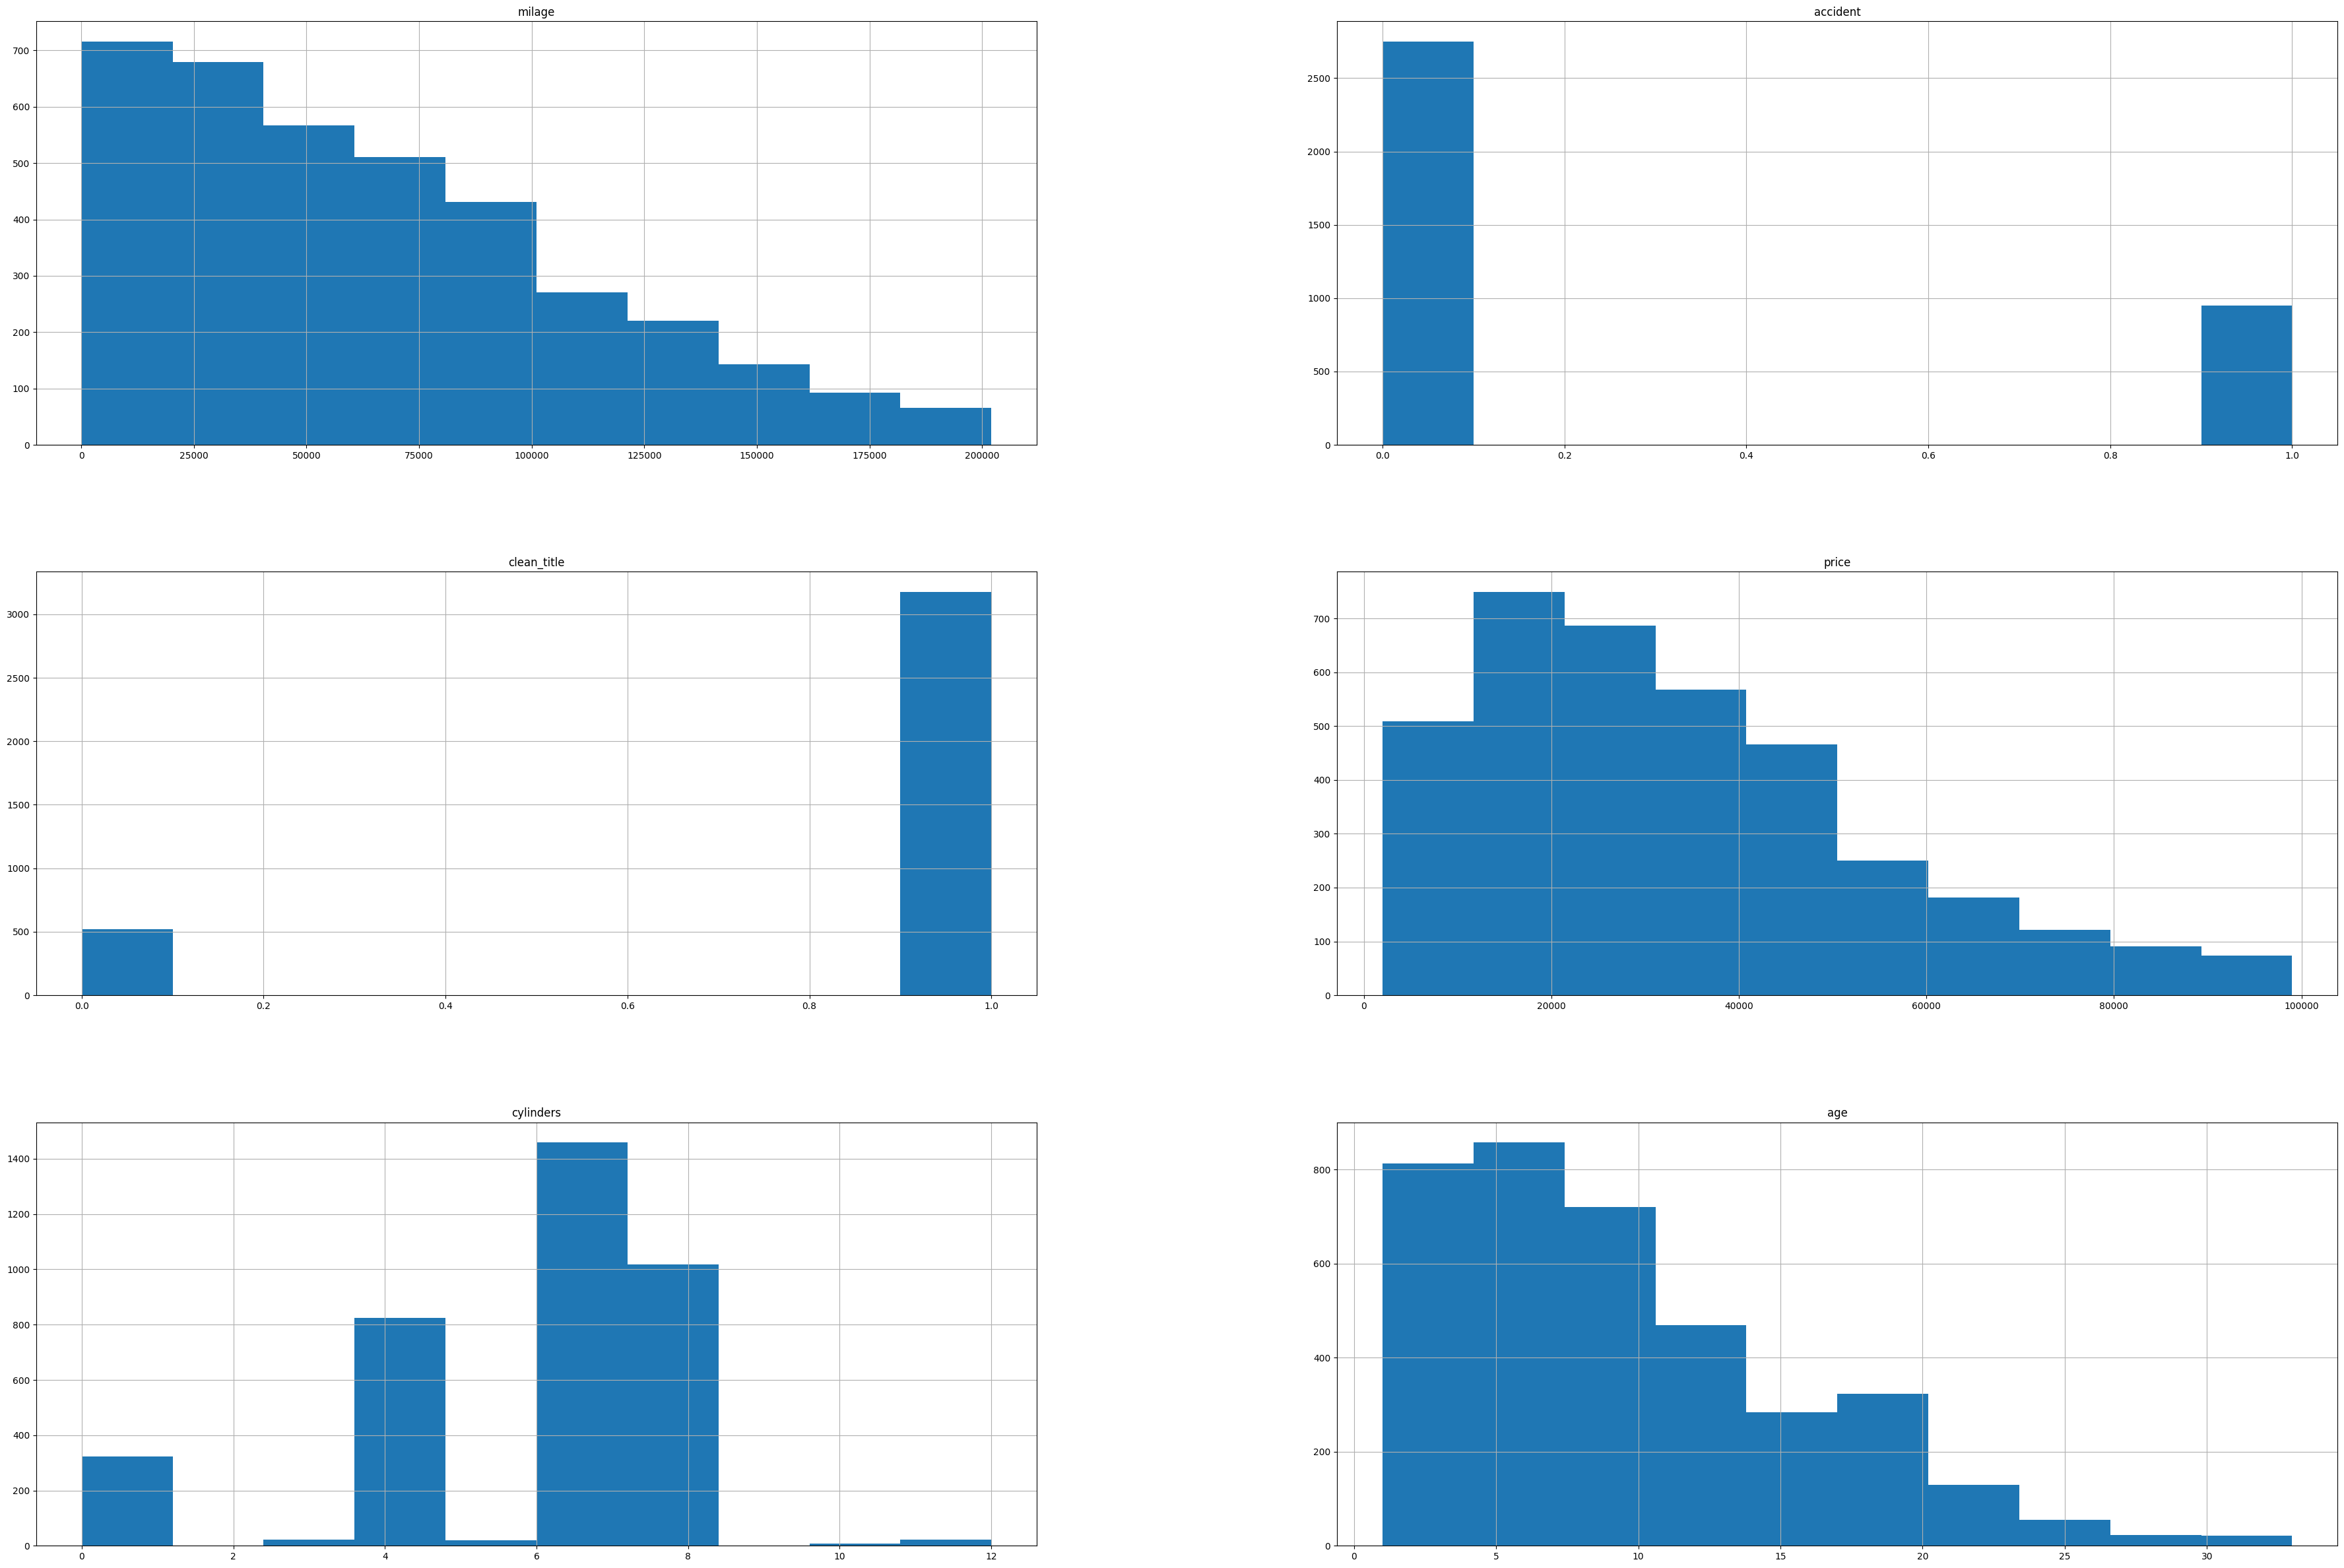

In [39]:
# Basic histograms
df.hist(figsize = (45,30));

> Lets take a look at how some of the numerical features interact with each other.

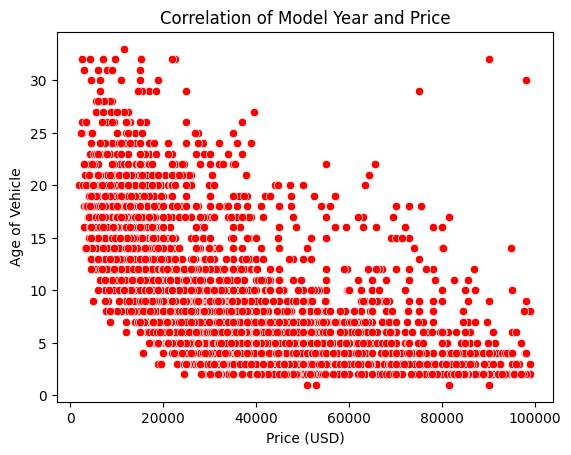

In [40]:
sns.scatterplot(df,
                x = 'price',
                y = 'age',
                color = 'red')

plt.title("Correlation of Model Year and Price")
plt.xlabel("Price (USD)")
plt.ylabel("Age of Vehicle");

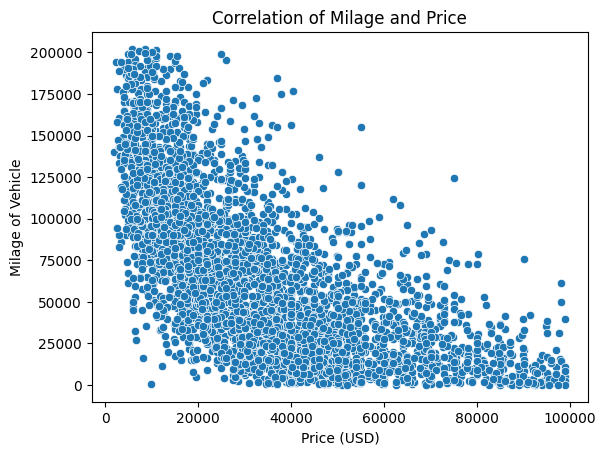

In [41]:
sns.scatterplot(df,
                x = 'price',
                y = 'milage',)

plt.title("Correlation of Milage and Price")
plt.xlabel("Price (USD)")
plt.ylabel("Milage of Vehicle");

> We can see, as may be expected, The lower the milage or the age of the vehicle the higher the average price. This will be very useful for the model.

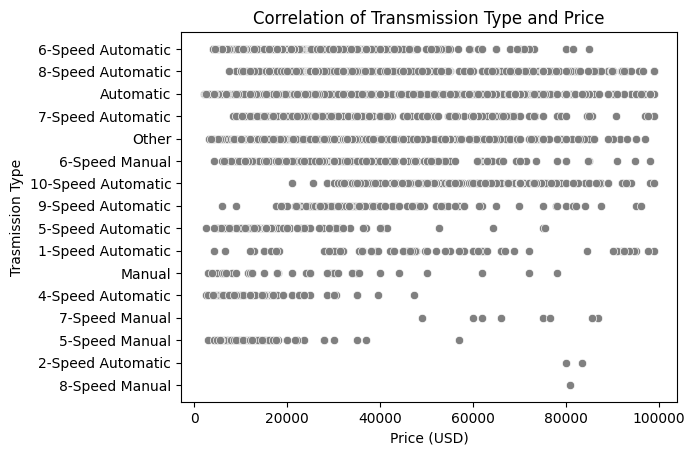

In [42]:
sns.scatterplot(df,
                x = 'price',
                y = 'transmission_cleaned',
                color = 'grey')

plt.title("Correlation of Transmission Type and Price")
plt.xlabel("Price (USD)")
plt.ylabel("Trasmission Type");

> Looking at how Transmission type affects the price a few things do stand out. First, the lower speeds tend to have lower prices. Secondly, there seems to be a clear split between Automatic and Manual Transmissions with Automatic being worth more on average.

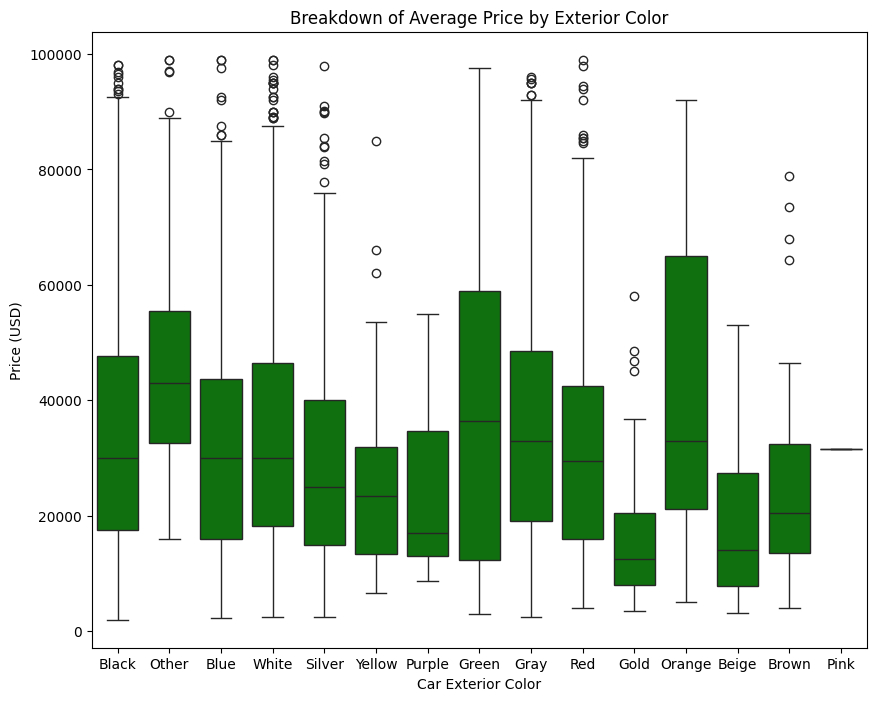

In [43]:
plt.figure(figsize = (10, 8))

sns.boxplot(df,
                y = 'price',
                x = 'ext_col_cleaned',
                color = 'Green')

plt.title("Breakdown of Average Price by Exterior Color")
plt.xlabel("Car Exterior Color")
plt.ylabel("Price (USD)");

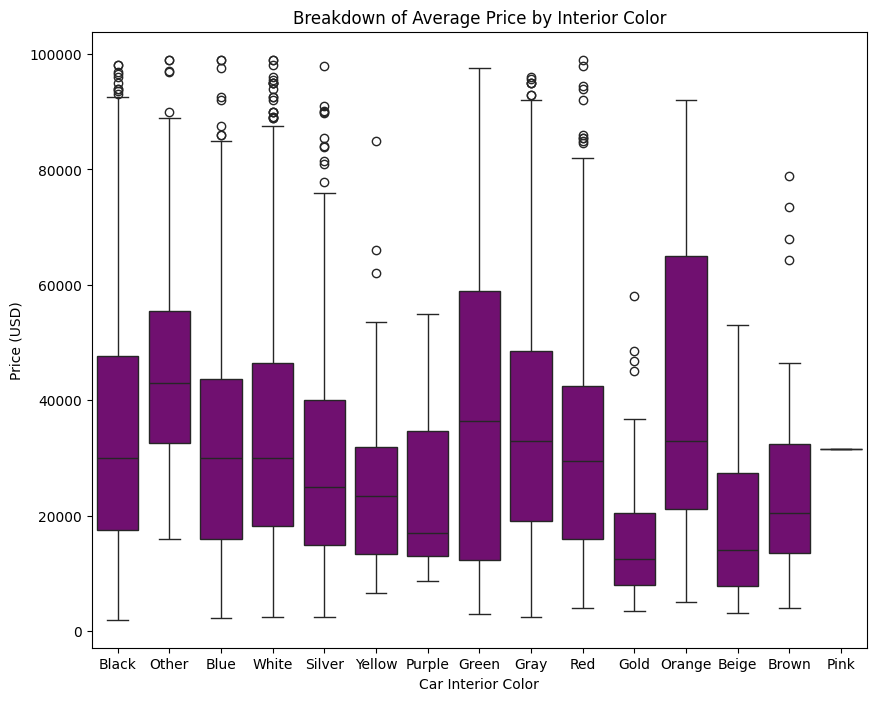

In [49]:
plt.figure(figsize = (10, 8))

sns.boxplot(df,
                y = 'price',
                x = 'ext_col_cleaned',
                color = 'Purple')

plt.title("Breakdown of Average Price by Interior Color")
plt.xlabel("Car Interior Color")
plt.ylabel("Price (USD)");

## Dummies

> Before continuing on to check out some heat maps, I first want to make our dummies so we can include them.

In [45]:
df_dummy = pd.get_dummies(df, columns =['brand', 'fuel_type', 'transmission_cleaned', 'ext_col_cleaned', 'int_col_cleaned'], dtype = int)

In [46]:
df.head()

,brand,milage,fuel_type,accident,clean_title,price,transmission_cleaned,int_col_cleaned,ext_col_cleaned,cylinders,age
0,Ford,51000,E85 Flex Fuel,1,1.0,10300,6-Speed Automatic,Black,Black,6.0,12
1,Hyundai,34742,Gasoline,1,1.0,38005,8-Speed Automatic,Gray,Other,6.0,4
2,Lexus,22372,Gasoline,0,0.0,54598,Automatic,Black,Blue,6.0,3
3,INFINITI,88900,Hybrid,0,1.0,15500,7-Speed Automatic,Black,Black,0.0,10
4,Audi,9835,Gasoline,0,0.0,34999,8-Speed Automatic,Black,White,4.0,4


> With the dummies made, I can now create a heat map showing the correlations to our target variable of price!

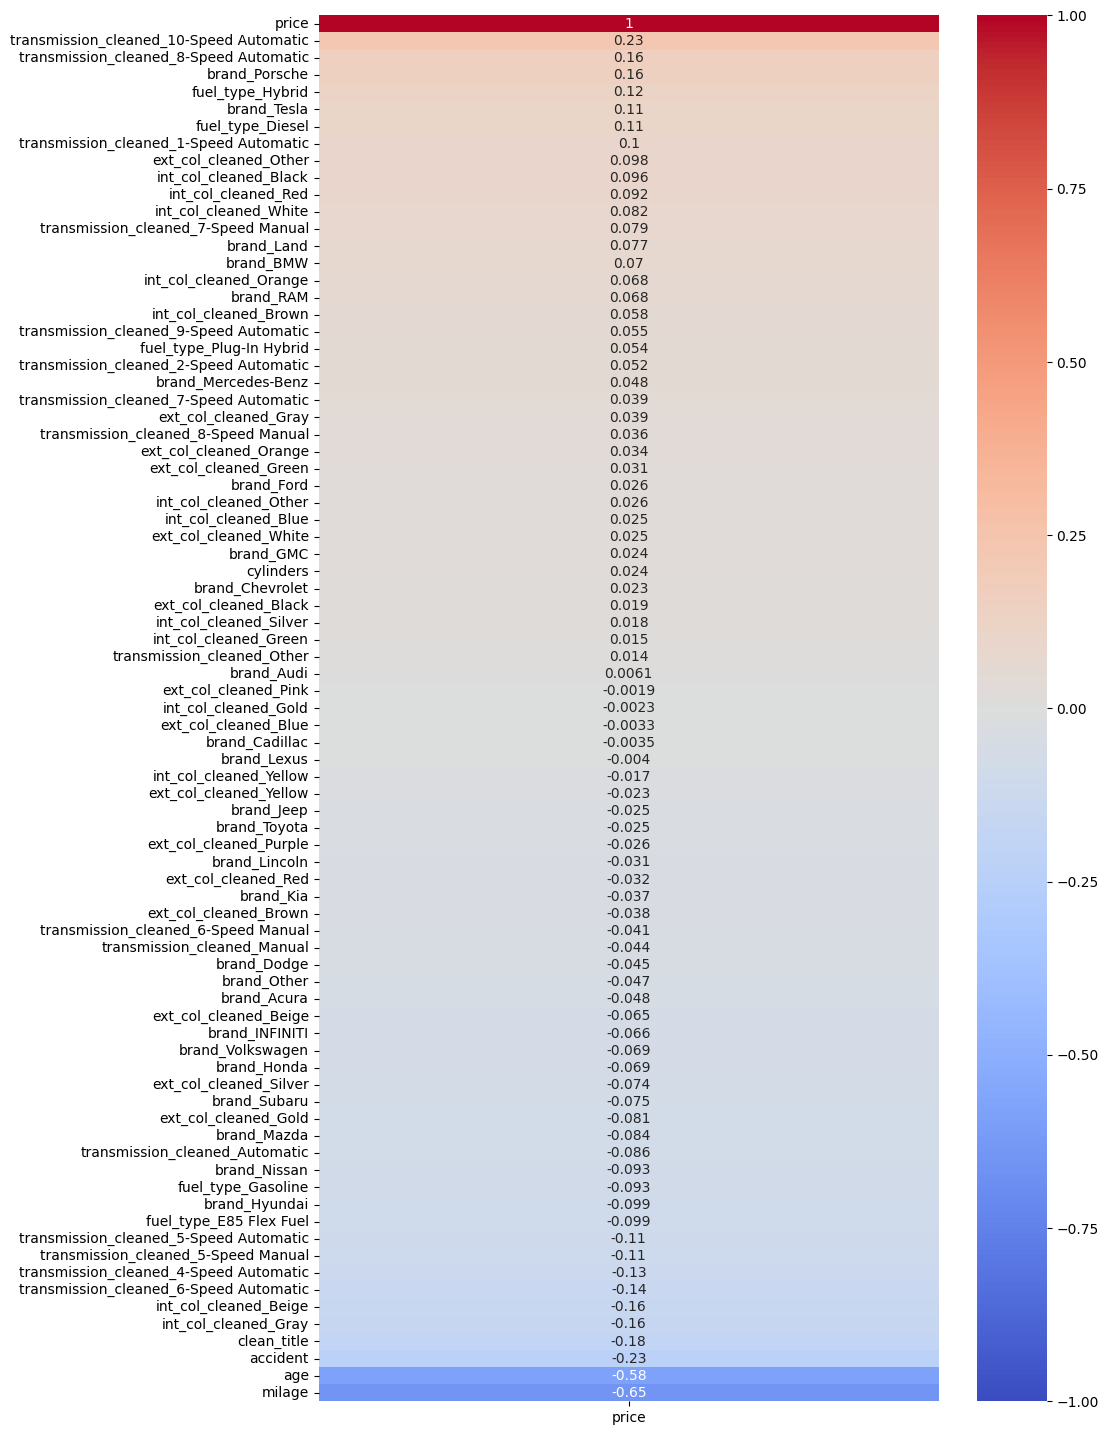

In [47]:
plt.figure(figsize = (10, 18))
sns.heatmap(df_dummy.corr(numeric_only = True)[['price']].sort_values(by = 'price', ascending = False),
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True);

> We can see a few interesting things in this heat map. First, the values with the highest level of correlations are the numerical non dummy values such as milage and age. This was to be expected. However, looking at the other correlations it does appear transmission type has a large correlation than many of the other features we made dummies for.

### Export for Model

> With everything set I will now export the dummy Data frame for use in the next notebook for modeling!

In [48]:
df_dummy.to_csv('Data/df_dummy.csv')